Firstly, we need to import all the necessory libraries for our project

In [11]:
import pandas as pd
import plotly.express as px
from IPython import display

then, we create dataframes from our datasets and clean them up, then modify the first one by adding increase parameter

In [12]:
df = pd.read_csv("HR Employee Attrition.csv")
df2 = pd.read_csv("salary_data_cleaned.csv")
df3 = pd.read_csv("unemployment analysis.csv")


def cleanup(df01, df02, df03):
    df01.dropna()
    df02.dropna()
    df03.dropna()
    df01["Age"] = df01["Age"].astype("int64")
    df01["DistanceFromHome"] = df01["DistanceFromHome"].astype("int64")
    df01["MonthlyIncome"] = df01["MonthlyIncome"].astype("int64")
    df02 = df02[(df02["age"] > 14) & (df02["age"] < 100)]
    df03.drop(columns=["Country Name", "Country Code"])
    return df01, df02, df03


def modify(df0):
    return df0.assign(increase=lambda x: x.MonthlyIncome * x.PercentSalaryHike * 0.01)


df, df2, df3 = cleanup(df, df2, df3)
df = modify(df)

Then we need to create functions for drawing plots

In [13]:
def drawpie(df, values):
    fig = px.pie(df, values=values, names=values)
    fig.show()


def drawhist(df, x, y, xl, yl):
    fig = px.histogram(df, x=x, y=y, labels={x: xl, y: yl}, histfunc="avg")
    fig.update_layout(bargap=0.1)
    fig.show()


def drawbox(df, x, y, xl, yl):
    fig = px.box(df, x=x, y=y, labels={x: xl, y: yl})
    fig.show()


def drawbar(df, x, y, xl, yl):
    fig = px.bar(df, x=x, y=y, labels={x[0]: xl, y[0]: yl}, barmode="group")
    fig.show()


def drawscatter(df, x, y, xl, yl):
    fig = px.scatter(df, x=x, y=y, trendline="ols", color="Rating", labels={x: xl, y[0]: yl})
    fig.show()


def drawline(df, x, y, xl, yl):
    fig = px.line(df, x=x, y=y, labels={x: xl, y[0]: yl})
    fig.show()


def drawheat(df, x, y, xl, yl):
    fig = px.density_heatmap(df, x=x, y=y, labels={x: xl, y: yl}, color_continuous_scale="sunsetdark", nbinsx=10,
                             nbinsy=10)
    fig.show()


Then we sort our datasets

In [14]:
df = df.sort_values(by=["JobSatisfaction", "MonthlyIncome", "JobInvolvement"])
df2 = df2.sort_values(by=["age", "avg_salary"])

I assume that monthly income and job involvement have a healthy effect on job satisfaction, to prove it, I plotted bar charts for each of these parameters in general and for different professions. Charts you see below are a great disproof for my hypothesis, as they show that income has a very subtle effect on one's level of satisfaction, same for job involvement, where individuals with highest income and/or involvement tend to be more satisfied with their career, but only slightly


Histogram was chosen to represent this because it is easy to undersrtand and very easy to compare parameters


In [15]:
drawhist(df, "MonthlyIncome", "JobSatisfaction", "Monthly Income", "Job Satisfaction")
drawhist(df, "JobInvolvement", "JobSatisfaction", "Job Involvement", "Job Satisfaction")

On the pie chart below, i represented different percentages of job satisfaction based on salary, the chart is interactive so you can select desired level of income and view percentages of different satisfaction levels among individuals whose income is within +-500$ of the selected amount(interactive part works only on web)

i chose pie chart here because it is the best plot to depict percentages and ratios

In [16]:
drawpie(df, "JobSatisfaction")

Bow chart below shows minimum and average wage requirements for individuals based on their age. Box chart was chosen here to make average values more clear as well as show extremes. I want to prove that most people get paid above their minimum threshold and this gap is not dependant on one's age

scatter plots are great to present gradial statistical data and deviations

In [17]:
drawscatter(df2, "age", "min_salary", "Age", "Minimal Salary")
drawscatter(df2, "age", "avg_salary", "Age", "Average Salary")


We can observe that two charts are almost identical apart from wages being noticeably higher in the second one. This example shows that most workers get paid on average 40-70 thousand $ more than their minimal requirements

In [18]:
drawheat(df2, "age", "avg_salary", "Age", "Average Salary")


Level of unemployment generally reflects what is happening with the world economy. line chart below depicts unemployment percentage in europe, us and average among all countries. all three trends follow the same pattern, proving the point that level of uneployment is a great metric for analyzing worldwide economical situation

line charts are industry standart and you can fit a lot of them on one plot, so they were the obvious choice

In [19]:
years = list(map(str, (range(1991, 2022))))
medians = []
europe = []
us = []
for i in years:
    medians.append(df3[str(i)].mean())
    europe.append((df3[df3["Country Code"] == "ECS"])[str(i)].mean())
    us.append((df3[df3["Country Code"] == "GBR"])[str(i)].mean())
data = {"year": years, "mids": medians, "europe": europe, "us": us}
df69 = pd.DataFrame.from_dict(data)
ys = ["mids", "europe", "us"]
drawline(df69, "year", ys, "Year", "Percentage Of Unemployment")
drawbar(df69, "year", ys, "Year", "Percentage Of Unemployment")


to present information about our datasets and their values i am using pd.describe method

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,increase
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,984.369476
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,763.337243
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,110.990000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,454.002500
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,725.610000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1227.987500
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4763.280000


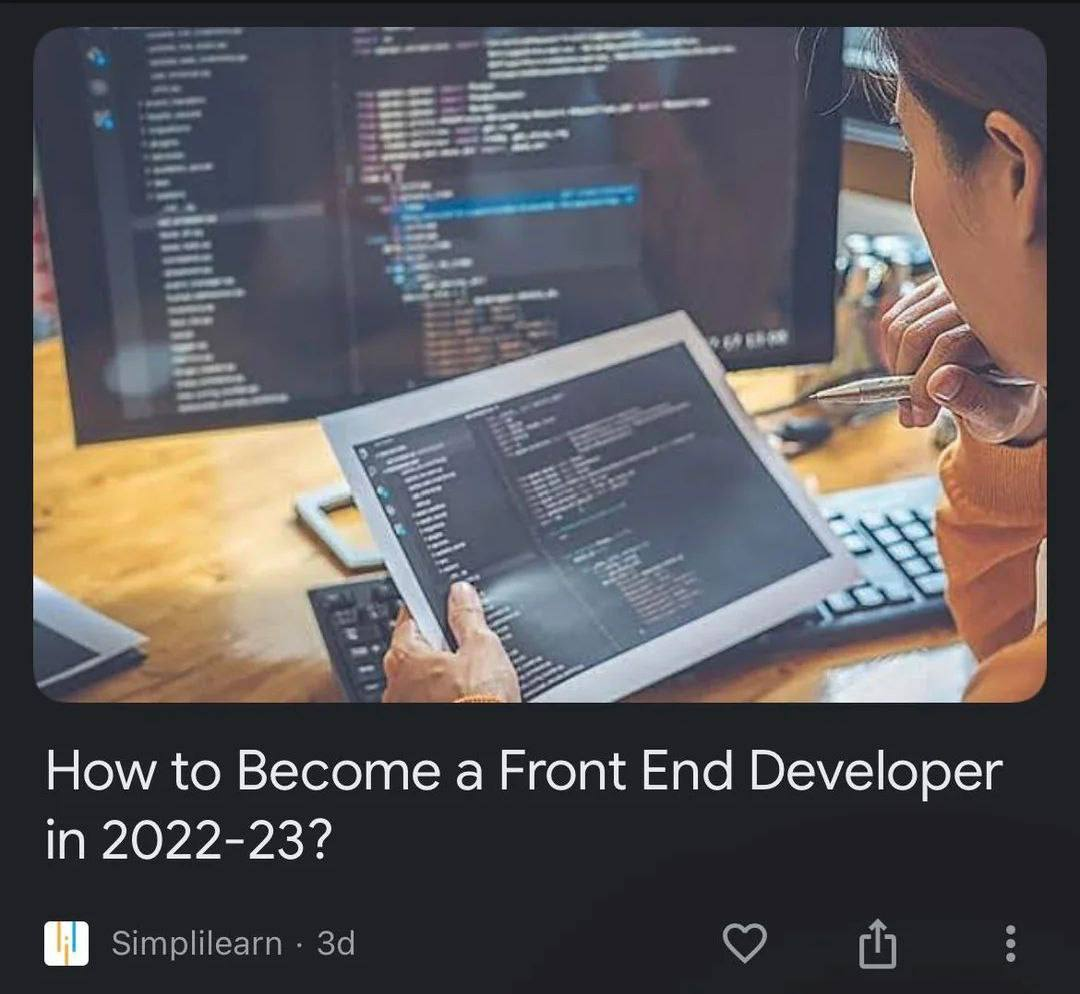

In [21]:
display.Image("photo_2022-12-11 18.57.55.png")